# Final Project Submission

* Student name:  Natalya Doris
* Student pace: self paced
* Scheduled project review date/time: Monday, Aug 1, 1pm
* Instructor name: Abhineet Kulkarni / Claude Fried
* Blog post URL: https://medium.com/@ntdoris/where-to-begin-choosing-a-baseline-linear-regression-model-when-you-have-limited-domain-knowledge-fe589ba10d3b


## Introduction

This project uses the King County House Sales dataset to better understand the housing market before real estate company Royal Homes finalizes their business strategy. What types of homes should they be looking to sell to make the most profit? What features lend towards higher sale prices?

## Data Inspection and Initial Cleaning

### Import Data & Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate, ShuffleSplit
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


Loading in data from the King County House Sales dataset:

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


The dataset contains 21,596 rows, each representing a house in King County, and 21 distinct columns, including variables describing a house's square footage, number of beds/baths, condition and grade, to name a few.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


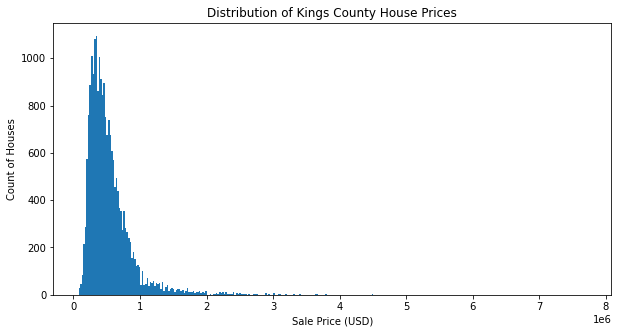

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['price'], bins='auto')

ax.set_xlabel("Sale Price (USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of Kings County House Prices");

Taking the log makes this data much more normal. Will keep that in mind for later.

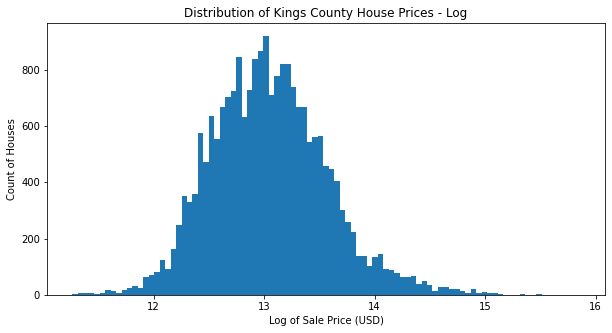

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(np.log(df['price']), bins='auto')

ax.set_xlabel("Log of Sale Price (USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of Kings County House Prices - Log");

In [7]:
y = df['price']
X = df.drop(['price'], axis=1)

### Handling Missing Values & Cleaning the Data

In [8]:
X.isna().sum()

id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
print(len(df[df["waterfront"].isna()]))
print(len(df[df["view"].isna()]))
print(len(df[df["yr_renovated"].isna()]))
print(" ")
print(len(df[df["yr_renovated"]==0])) 
print(len(df[df["view"]=='NONE']))
print(" ")
print(len(df[df["waterfront"].isna() & (df["view"]=='NONE')])) # houses with waterfront as NA don't have view
print(len(df[df["view"].isna() | (df["view"]=='NONE')]))

2376
63
3842
 
17011
19422
 
2110
19485


In [10]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [11]:
X['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [12]:
X['sqft_basement'].value_counts()
X['sqft_basement'][X['sqft_basement']=='?'] = 1.0
X['sqft_basement'][X['sqft_basement']==0.0] = 1.0 # setting to 1 so that we can take the log
X['sqft_basement'] = X['sqft_basement'].astype(float)
X['has_basement'] = [0 if basement==1.0 else 1 for basement in X['sqft_basement']]
X['has_basement'].value_counts()

/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_27237/3786226204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sqft_basement'][X['sqft_basement']=='?'] = 1.0
/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_27237/3786226204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sqft_basement'][X['sqft_basement']==0.0] = 1.0 # setting to 1 so that we can take the log


1    21143
0      454
Name: has_basement, dtype: int64

While there aren't many missing values, a significant number of houses have no view, are not waterfront, or have a 0 value for year renovated. I am inclined not to include these variables in the model as very few houses are impacted by these metrics. Nonetheless, I will perform some feature engineering so that I can see how they impact the model.

In [13]:
X['yr_renovated'][X['yr_renovated'] == 0] = 'NA'
X['yr_renovated'][X['yr_renovated'].isna()] = 'NA'
X['renovated'] = [0 if house=='NA' else 1 for house in X['yr_renovated']]

sum(X['renovated'])

/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_27237/1224829936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['yr_renovated'][X['yr_renovated'] == 0] = 'NA'


744

In [14]:
X['view'][X['view'].isna()] = 'NA'
set(X['view'])

/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_27237/670772084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['view'][X['view'].isna()] = 'NA'


{'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NA', 'NONE'}

In [15]:
X['waterfront'][X['waterfront'].isna()] = 'NA'
X['waterfront'].value_counts()

/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_27237/808933529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['waterfront'][X['waterfront'].isna()] = 'NA'


NO     19075
NA      2376
YES      146
Name: waterfront, dtype: int64

In [16]:
print(X['date'][0])

X['date'] = [datetime.strptime(date, '%m/%d/%Y') for date in X['date']]
X['yr_sold'] = pd.DatetimeIndex(X['date']).year
X['mth_sold'] = pd.DatetimeIndex(X['date']).month

X.head()

10/13/2014


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,renovated,yr_sold,mth_sold
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,NA,NONE,Average,...,NA,98178,47.5112,-122.257,1340,5650,1,0,2014,10
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1991.0,98125,47.7210,-122.319,1690,7639,1,1,2014,12
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,NO,NONE,Average,...,NA,98028,47.7379,-122.233,2720,8062,1,0,2015,2
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,NA,98136,47.5208,-122.393,1360,5000,1,0,2014,12
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,NO,NONE,Average,...,NA,98074,47.6168,-122.045,1800,7503,1,0,2015,2


In [17]:
X['grade'] = [int(grade.split(" ")[0]) for grade in X['grade']]
set(X['grade'])

{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [18]:
set(X['condition']) # need to get rid of space in very good for model purposes

{'Average', 'Fair', 'Good', 'Poor', 'Very Good'}

In [19]:
X['condition'][X['condition']=='Very Good'] = 'VeryGood'
set(X['condition'])

/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_27237/3950577358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['condition'][X['condition']=='Very Good'] = 'VeryGood'


{'Average', 'Fair', 'Good', 'Poor', 'VeryGood'}

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  object        
 8   view           21597 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  object        
 15  zipcode        2159

## Baseline Model

### Checking Correlations

Text(0.5, 1.0, 'Heatmap of Correlation Between Attributes (Including Price)')

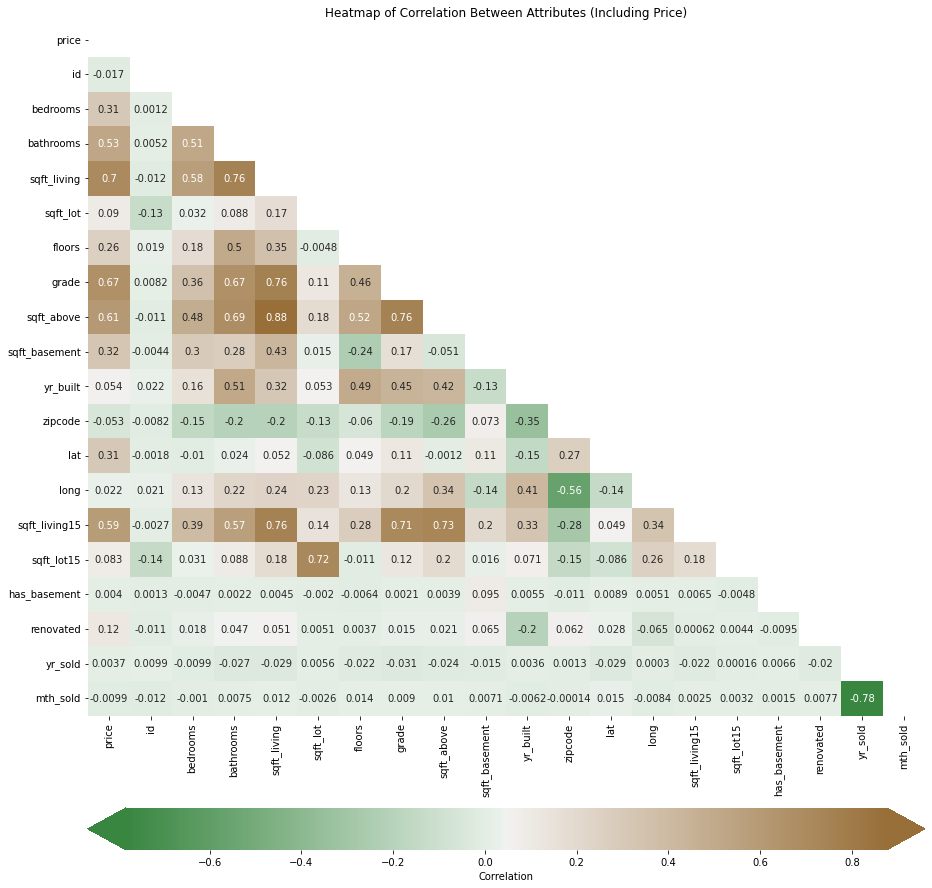

In [21]:
heatmap_data = pd.concat([y, X], axis=1)
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(15, 17))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(130, 50, as_cmap=True)
cbar_kws = {"label": "Correlation", "orientation": "horizontal", "pad": .1, "extend": "both"}

sns.heatmap(data=corr, mask=mask, ax=ax, annot=True, cbar_kws=cbar_kws, cmap=cmap)

ax.set_title("Heatmap of Correlation Between Attributes (Including Price)")

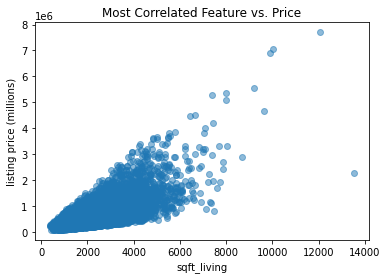

In [22]:
most_correlated_feature = 'sqft_living'

fig, ax = plt.subplots()

ax.scatter(X[most_correlated_feature], y, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price (millions)")
ax.set_title("Most Correlated Feature vs. Price");
#ax.ticklabel_format(style='plain')

# I suspect a log transformation will improve the linearity

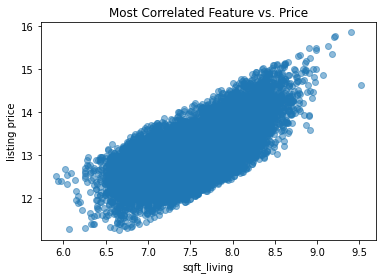

In [23]:
fig, ax = plt.subplots()

ax.scatter(np.log(X[most_correlated_feature]), np.log(y), alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Price");

# very linear after log transformation

### Build Baseline Model With Most Correlated Feature as Independent Variable

Even if we hadn't used correlation to pick an independent variable for this first model, square footage would have been an obvious choice. It makes sense that a house's square footage has a positive relationship with price.

In [24]:
outcome = 'price'
data_ols = pd.concat([X, y], axis=1)
predictors = 'sqft_living'
formula = outcome + '~' + predictors

base_model = ols(formula=formula, data=data_ols).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:43:49   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking Base Model Assumptions

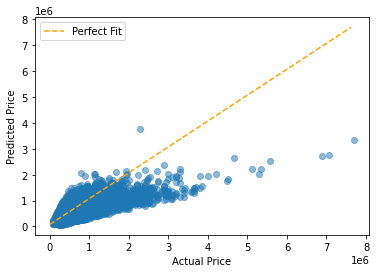

In [25]:
# Linearity check

X_base = X[most_correlated_feature]

preds = base_model.predict(X_base)
fig, ax = plt.subplots()

perfect_line = np.arange(y.min(), y.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

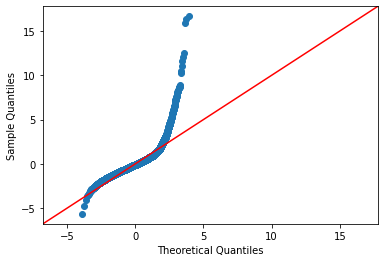

In [26]:
# Normality check

residuals = (y - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [27]:
# JB test for normality (also shown in model summary)
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(base_model.resid)
list(zip(name, test))

[('Jarque-Bera', 542662.604395781),
 ('Prob', 0.0),
 ('Skew', 2.8196584324835365),
 ('Kurtosis', 26.90063410219435)]

We have a JB value = ~543,000, indicating that errors are not normally distributed. The p-value of 0.0 also favors rejecting the normality null hypothesis at the 5% significance level. Additionally, the kurtosis is above 3, which indicates heavier tails than a normal distribution. The skewness value also shows that underlying data is heavily skewed.

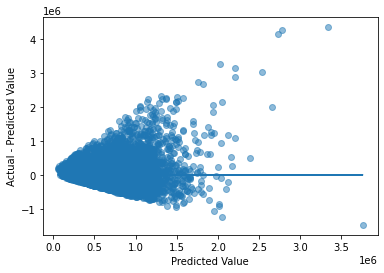

In [28]:
# Homoscedasticity check - conelike shape suggests heteroskedasticity of residuals

fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_base))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

In [29]:
# Goldfeld Quandt test for homoscedasticity check

lwr_thresh = data_ols.sqft_living.quantile(q=.45)
upr_thresh = data_ols.sqft_living.quantile(q=.55)
middle_10percent_indices = data_ols[(data_ols.sqft_living >= lwr_thresh) 
                                    & (data_ols.sqft_living<=upr_thresh)].index
indices = [x-1 for x in data_ols.index if x not in middle_10percent_indices]

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(base_model.resid.iloc[indices], base_model.model.exog[indices])
list(zip(name, test))

[('F statistic', 0.9159859051813802), ('p-value', 0.9999921364751672)]

While this relatively large F statistic suggests heteroscedasticity, we cannot confirm this result via the GQ test given the p-value > 0.05. A cone-like shape as seen in the graph above, however, shows obvious heteroscedasticity, in my opinion.

This baseline model fails all of our assumption checks. Let's see if we can improve the next one..

### Data Preparation for Second Model

Visually inspecting relationships between numerical variables and price:

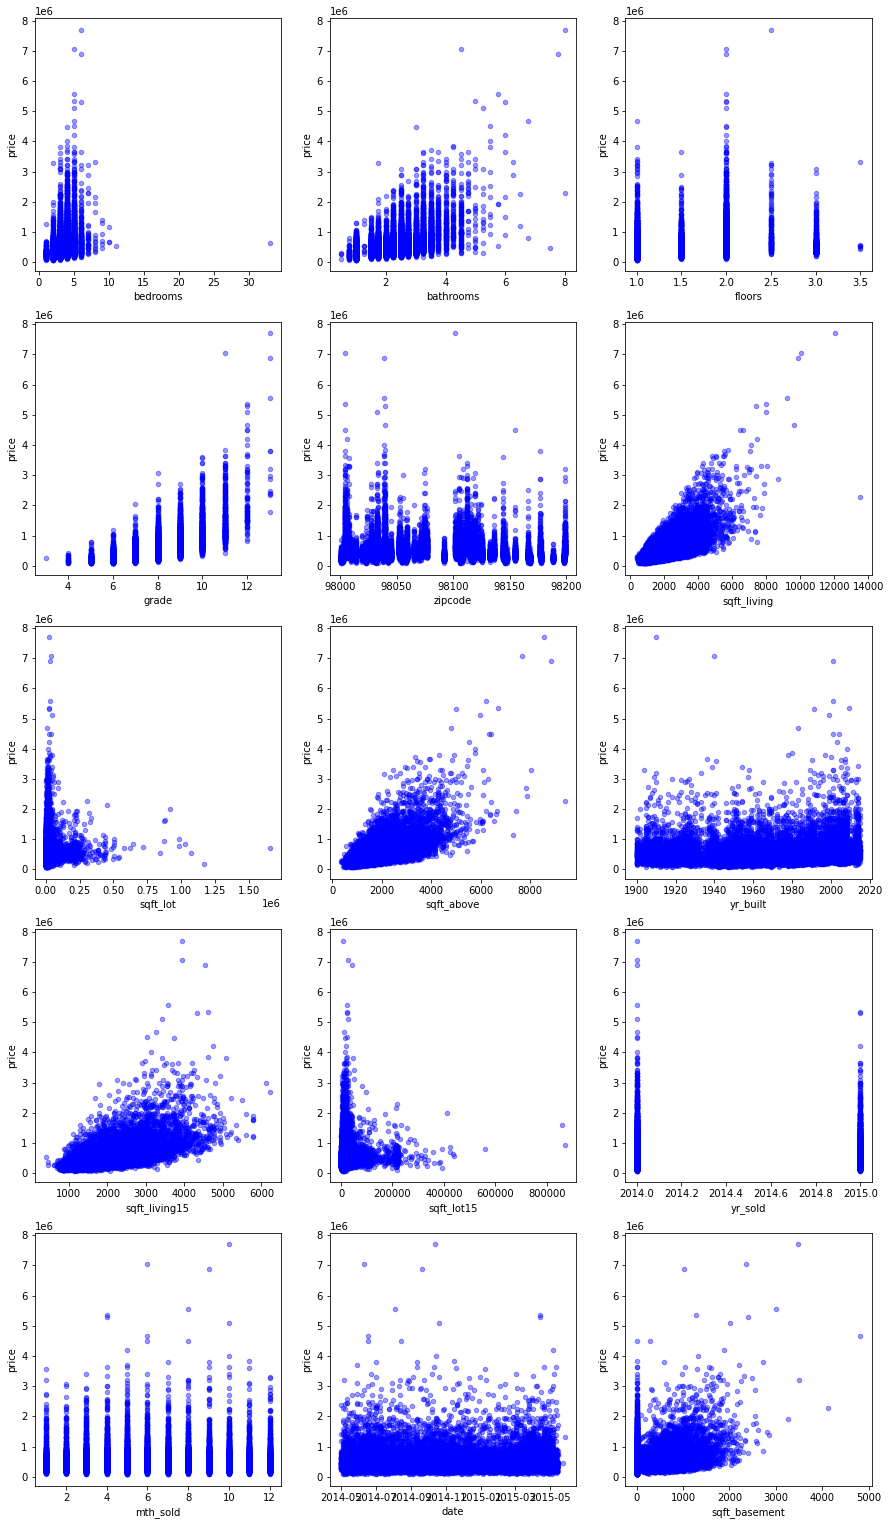

In [30]:
num_cols = ['bedrooms', # number of bedrooms
            'bathrooms', # number of bathrooms
            'floors', # number of floors (levels) in the house
            'grade', # Overall grade of the house. Related to the construction and design of the house
            'zipcode', #  zip code
            'sqft_living', # sq. ft. of living space
            'sqft_lot', # Square footage of the lot
            'sqft_above', # Square footage of house apart from basement
            'yr_built', # year house was built
            'sqft_living15', # sq. ft. of interior housing living space for the nearest 15 neighbors
            'sqft_lot15', # sq. ft. of the land lots of the nearest 15 neighbors
            'yr_sold', # year house was sold
            'mth_sold', # month house was sold
            'date',
            'sqft_basement'
           ]

data = pd.concat([X, y], axis=1)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,27))
axe = axes.ravel()

for xcol, ax in zip(num_cols, axe):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

I am going to exclude latitude and longitude as we can use zip code to represent location/neighborhood. I'd like to treat zip code as a categorical variable since this is not really a linear relationship but it is possible that certain zip codes have a higher average price. I also think keeping zip code categorical makes it easier to interpret.

In [31]:
relevant_columns = ['bedrooms', # number of bedrooms
                    'bathrooms', # number of bathrooms
                    'floors', # number of floors (levels) in the house
                    'waterfront', # whether the house is on the waterfront
                    'view', # quality of view from house
                    'condition', # How good the overall condition of the house is;
                                 # related to maintenance of house.
                    'grade', # Overall grade of the house. Related to the construction and design of the house
                    'zipcode', #  zip code
                    'sqft_living', # sq. ft. of living space
                    'sqft_lot', # Square footage of the lot
                    'sqft_above', # Square footage of house apart from basement
                    'yr_built', # year house was built
                    'sqft_living15', # sq. ft. of interior housing living space for the nearest 15 neighbors
                    'sqft_lot15', # sq. ft. of the land lots of the nearest 15 neighbors
                    'sqft_basement', # sq. ft. of basement
                    'mth_sold', # month house was sold
                    'yr_sold', # year house was sold
                    'lat', # latitude
                    'renovated', # whether a house had a year populated in the yr_renovated column
                    'has_basement' #whether a house has a basement
                   ]
                    
categoricals = ['waterfront', 'view', 'condition', 'zipcode']
continuous = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'grade', 'yr_built', 
              'sqft_living15', 'sqft_lot15', 'floors', 'lat', 'renovated', 'yr_sold', 'mth_sold',
              'sqft_basement', 'has_basement'
             ]

X = X[relevant_columns]
X

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,sqft_basement,mth_sold,yr_sold,lat,renovated,has_basement
0,3,1.00,1.0,NA,NONE,Average,7,98178,1180,5650,1180,1955,1340,5650,0.0,10,2014,47.5112,0,1
1,3,2.25,2.0,NO,NONE,Average,7,98125,2570,7242,2170,1951,1690,7639,400.0,12,2014,47.7210,1,1
2,2,1.00,1.0,NO,NONE,Average,6,98028,770,10000,770,1933,2720,8062,0.0,2,2015,47.7379,0,1
3,4,3.00,1.0,NO,NONE,VeryGood,7,98136,1960,5000,1050,1965,1360,5000,910.0,12,2014,47.5208,0,1
4,3,2.00,1.0,NO,NONE,Average,8,98074,1680,8080,1680,1987,1800,7503,0.0,2,2015,47.6168,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,NO,NONE,Average,8,98103,1530,1131,1530,2009,1530,1509,0.0,5,2014,47.6993,0,1
21593,4,2.50,2.0,NO,NONE,Average,8,98146,2310,5813,2310,2014,1830,7200,0.0,2,2015,47.5107,0,1
21594,2,0.75,2.0,NO,NONE,Average,7,98144,1020,1350,1020,2009,1020,2007,0.0,6,2014,47.5944,0,1
21595,3,2.50,2.0,NA,NONE,Average,8,98027,1600,2388,1600,2004,1410,1287,0.0,1,2015,47.5345,0,1


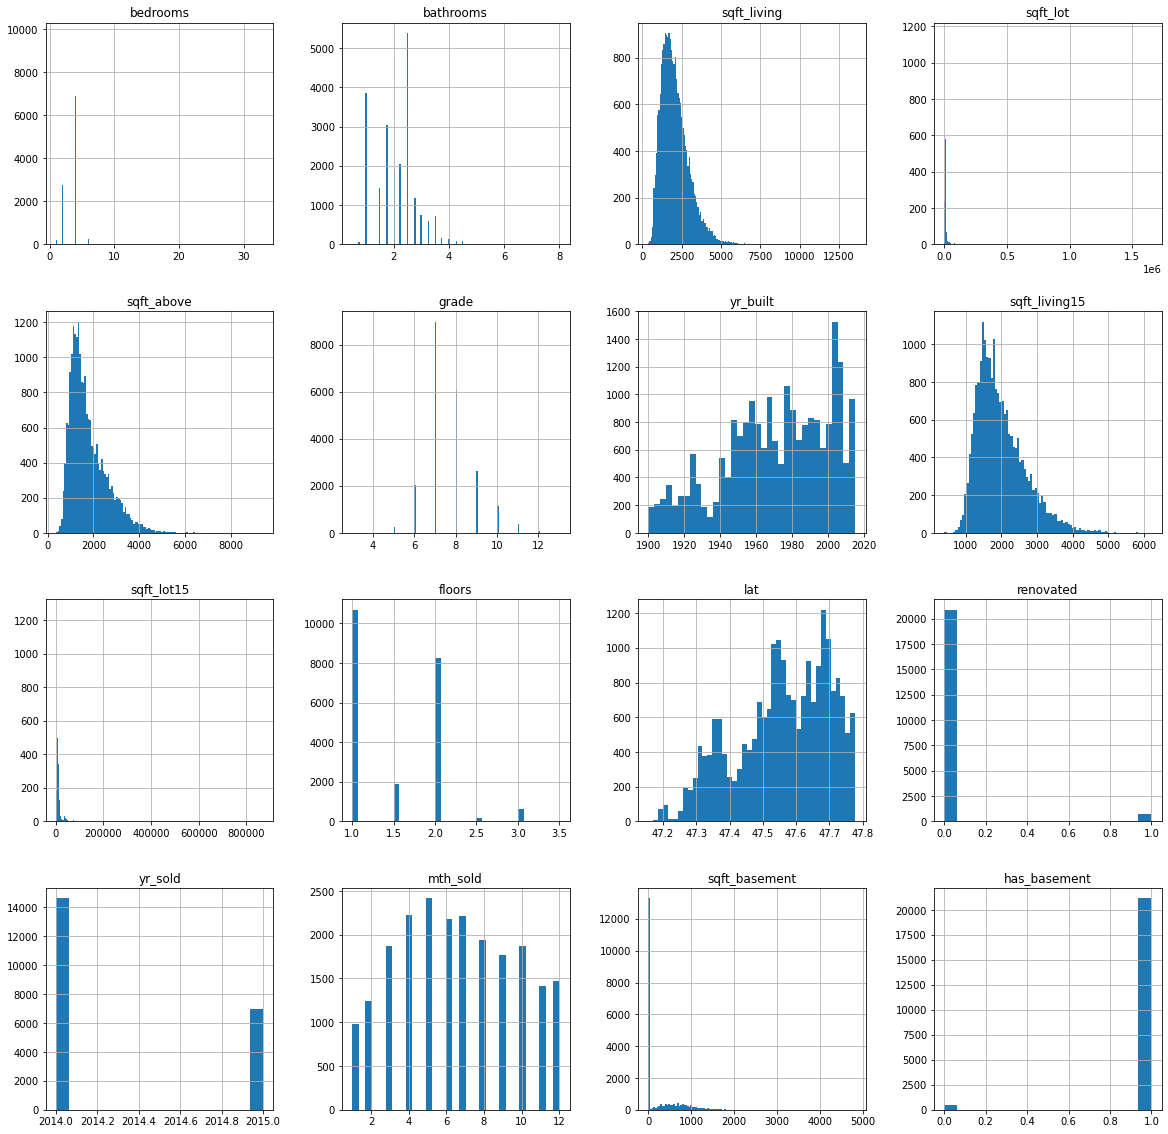

In [32]:
X[continuous].hist(figsize=[20, 20], bins='auto');

### Check for Multicollinearity

In [33]:
df_corr=X[continuous].corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)

df_corr[(df_corr.cc>.70) & (df_corr.cc<0.99)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(mth_sold, yr_sold)",0.782325
"(grade, sqft_living)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073
"(bathrooms, sqft_living)",0.755758
"(sqft_living15, sqft_above)",0.731767
"(sqft_lot15, sqft_lot)",0.718204
"(sqft_living15, grade)",0.713867


### Preprocessing

Taking the kitchen sink approach for this second model - including as many variables as I can without introducing too much multicollinearity.

In [34]:
# one hot encode categoricals

dummy_cat = ['condition', 'waterfront', 'view']
df_ohe = pd.get_dummies(X[dummy_cat], prefix=dummy_cat, drop_first=True)
zipcode_dummies = pd.get_dummies(X['zipcode'], prefix='zip', drop_first=True)

In [35]:
cont = ['sqft_living', 'sqft_lot', 'bedrooms', 'floors', 'mth_sold', 'renovated', 'yr_built', 'sqft_basement']
# excluding grade, sqft_above, sqft_living15, bathrooms given high correlation with sqft_living
# excluding yr_sold given high correlation with mth_sold

X_preprocessed = pd.concat([X[cont], df_ohe, zipcode_dummies], axis=1)
X_preprocessed

,sqft_living,sqft_lot,bedrooms,floors,mth_sold,renovated,yr_built,sqft_basement,condition_Fair,condition_Good,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,1180,5650,3,1.0,10,0,1955,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2570,7242,3,2.0,12,1,1951,400.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,770,10000,2,1.0,2,0,1933,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,4,1.0,12,0,1965,910.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1680,8080,3,1.0,2,0,1987,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1131,3,3.0,5,0,2009,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,2310,5813,4,2.0,2,0,2014,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,1020,1350,2,2.0,6,0,2009,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,1600,2388,3,2.0,1,0,2004,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


Played around with latitude and zip code a bit to get the following results:
* removing lat, keeping zip yields 0.853 R2 but way lower cond. no (500), similar skew and kurt - best model
* keeping lat, removing zip yields 0.69 R2
* removing both yields very low R2 around 0.523
* keeping both - 0.857 R2, 3544.428 JB, 4.88e+04 cond no, -0.13 skew, 5 kurt

In [36]:
X_preprocessed.columns

Index(['sqft_living', 'sqft_lot', 'bedrooms', 'floors', 'mth_sold',
       'renovated', 'yr_built', 'sqft_basement', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_VeryGood',
       'waterfront_NO', 'waterfront_YES', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NA', 'view_NONE', 'zip_98002', 'zip_98003',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022',
       'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034',
       'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058',
       'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074',
       'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103',
       'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109',
       'z

### Continuous Variables - Transformations 

In [37]:
# dependent variable - log transformation improves the model
y_log = pd.DataFrame(np.log(y))

### Second Model - Results and Assumptions Check

In [38]:
outcome = 'price'
data_ols = pd.concat([y_log, X_preprocessed], axis=1)
predictors = data_ols.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

second_model = ols(formula=formula, data=data_ols).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1462.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:44:15   Log-Likelihood:                 4193.6
No. Observations:               21597   AIC:                            -8209.
Df Residuals:                   21508   BIC:                            -7499.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.4773      0.142     73.933      0.000      10.200      10.755
sqft_living            0.0003   2.55e-06    134.163      0.000       0.000       0.000
sqft_lot            6.631e-07   3.62e-08     18.299      0.000    5.92e-07    7.34e-07
bedrooms              -0.0047      0.002     -2.536      0.011      -0.008      -0.001
floors                -0.0213      0.004     -5.582      0.000      -0.029      -0.014
mth_sold              -0.0050      0.000    -11.512      0.000      -0.006      -0.004
renovated              0.0877      0.008     11.125      0.000       0.072       0.103
yr_built               0.0008   7.23e-05     11.060      0.000       0.001       0.001
sqft_basement         -0.0001    4.3e-06    -28.016      0.000      -0.000      -0.000
condition_Fair        -0.1688      0.016    -10.827      0.000      -0.199      -0.138
condition_Good         0.0413      0.004     11.675      0.000       0.034       0.048
condition_Poor        -0.3377      0.037     -9.046      0.000      -0.411      -0.265
condition_VeryGood     0.1095      0.006     19.625      0.000       0.099       0.120
waterfront_NO          0.0021      0.004      0.487      0.626      -0.006       0.011
waterfront_YES         0.4134      0.021     19.773      0.000       0.372       0.454
view_EXCELLENT         0.2128      0.015     13.969      0.000       0.183       0.243
view_FAIR              0.0071      0.013      0.549      0.583      -0.018       0.032
view_GOOD              0.0869      0.011      7.871      0.000       0.065       0.109
view_NA               -0.0876      0.026     -3.363      0.001      -0.139      -0.037
view_NONE             -0.1528      0.007    -22.241      0.000      -0.166      -0.139
zip_98002             -0.0708      0.018     -4.009      0.000      -0.105      -0.036
zip_98003              0.0391      0.016      2.456      0.014       0.008       0.070
zip_98004              1.1813      0.016     76.126      0.000       1.151       1.212
zip_98005              0.8338      0.019     44.490      0.000       0.797       0.870
zip_98006              0.7182      0.014     51.482      0.000       0.691       0.746
zip_98007              0.7148      0.020     35.973      0.000       0.676       0.754
zip_98008              0.6826      0.016     42.865      0.000       0.651       0.714
zip_98010              0.2263      0.023      9.998      0.000       0.182       0.271
zip_98011              0.4888      0.018     27.511      0.000       0.454       0.524
zip_98014              0.2775      0.021     13.210      0.000       0.236       0.319
zip_98019              0.3207      0.018     17.868      0.000       0.286       0.356
zip_98022              0.0245      0.017      1.440      0.150      -0.009       0.058
zip_98023             -0.0014      0.0

In [39]:
# dropping variables with high p values - improves Cond. No.
X_preprocessed = X_preprocessed.drop(['waterfront_NO', 'view_FAIR', 'zip_98023', 
                                      'zip_98032', 'zip_98168'], axis=1)

outcome = 'price'
data_ols = pd.concat([y_log, X_preprocessed], axis=1)
predictors = data_ols.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

second_model = ols(formula=formula, data=data_ols).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1550.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:44:16   Log-Likelihood:                 4188.1
No. Observations:               21597   AIC:                            -8208.
Df Residuals:                   21513   BIC:                            -7538.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.5271      0.140     75.178      0.000      10.253      10.802
sqft_living            0.0003   2.55e-06    134.192      0.000       0.000       0.000
sqft_lot            6.628e-07   3.62e-08     18.293      0.000    5.92e-07    7.34e-07
bedrooms              -0.0049      0.002     -2.615      0.009      -0.009      -0.001
floors                -0.0210      0.004     -5.501      0.000      -0.028      -0.013
mth_sold              -0.0050      0.000    -11.516      0.000      -0.006      -0.004
renovated              0.0872      0.008     11.062      0.000       0.072       0.103
yr_built               0.0008   7.18e-05     10.846      0.000       0.001       0.001
sqft_basement         -0.0001    4.3e-06    -27.959      0.000      -0.000      -0.000
condition_Fair        -0.1682      0.016    -10.790      0.000      -0.199      -0.138
condition_Good         0.0405      0.004     11.463      0.000       0.034       0.047
condition_Poor        -0.3366      0.037     -9.016      0.000      -0.410      -0.263
condition_VeryGood     0.1089      0.006     19.527      0.000       0.098       0.120
waterfront_YES         0.4113      0.021     19.989      0.000       0.371       0.452
view_EXCELLENT         0.2110      0.015     14.174      0.000       0.182       0.240
view_GOOD              0.0851      0.011      8.070      0.000       0.064       0.106
view_NA               -0.0897      0.026     -3.475      0.001      -0.140      -0.039
view_NONE             -0.1545      0.006    -25.546      0.000      -0.166      -0.143
zip_98002             -0.0755      0.015     -4.942      0.000      -0.105      -0.046
zip_98003              0.0344      0.013      2.606      0.009       0.009       0.060
zip_98004              1.1769      0.013     92.544      0.000       1.152       1.202
zip_98005              0.8294      0.017     50.261      0.000       0.797       0.862
zip_98006              0.7137      0.011     66.253      0.000       0.693       0.735
zip_98007              0.7101      0.018     39.945      0.000       0.675       0.745
zip_98008              0.6779      0.013     51.337      0.000       0.652       0.704
zip_98010              0.2217      0.021     10.633      0.000       0.181       0.263
zip_98011              0.4841      0.015     31.426      0.000       0.454       0.514
zip_98014              0.2726      0.019     14.293      0.000       0.235       0.310
zip_98019              0.3160      0.016     20.201      0.000       0.285       0.347
zip_98022              0.0196      0.015      1.352      0.176      -0.009       0.048
zip_98024              0.4057      0.023     17.430      0.000       0.360       0.451
zip_98027              0.5471      0.011     47.776      0.000       0.525       0.570
zip_98028              0.4389      0.0

There is certainly improvement in this model compared to the baseline, both in terms of R^2 and the various model assumptions. The JB value is still quite large, indicating that errors are not normally distributed, and kurtosis is above 3, indicating the data has heavier tails than a normal distribution. No VIF is above 5, but a few are in the 2-3 range, which could likely be improved. We can probably get rid of a few independent variables in our next model to reduce multicollinearity even further and even transform some to reduce skew / kurtosis, hopefully without sacrificing R^2 greatly.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


JB Results [('Jarque-Bera', 12440.829118754615), ('Prob', 0.0), ('Skew', -0.4396203133317141), ('Kurtosis', 6.6127551167262135)]
Empty DataFrame
Columns: [cc]
Index: []
mth_sold              1.006074
condition_Poor        1.012263
condition_Fair        1.027782
zip_98148             1.046476
view_NA               1.050705
                      ...     
sqft_basement         1.937326
floors                2.291060
yr_built              2.409667
sqft_living           2.969580
const             10618.345439
Name: Variance Inflation Factor, Length: 84, dtype: float64


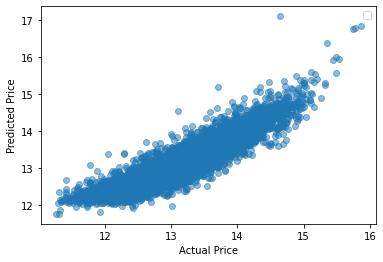

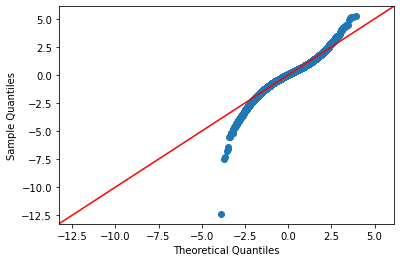

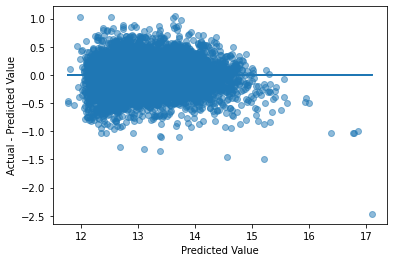

In [40]:
# Linearity check

model = second_model
X_model = X_preprocessed
y_model = y_log['price']

preds = model.predict(X_model)
fig, ax = plt.subplots()
ax.scatter(y_model, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

# Normality of residuals check

residuals = (y_model - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

# JB test
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
print("JB Results", list(zip(name, test)))

# Homoscedasticity check

fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_model))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

# multicollinearity

df_corr=X_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)
print(df_corr[(df_corr.cc>.75) & (df_corr.cc<0.99)])

predictors_int = sm.add_constant(predictors)
model = sm.OLS(y_log['price'],predictors_int).fit()
vif = [variance_inflation_factor(predictors_int.values, i) for i in range(predictors_int.shape[1])]
vif_ser = pd.Series(vif, index=predictors_int.columns, name="Variance Inflation Factor")
print(vif_ser.sort_values())

### Final Model

Going to take log of sq footage to see if that improves residuals, also going to get rid of Waterfront_NO, view_FAIR, and zip codes with high p values.

In [41]:
X_preprocessed.columns

Index(['sqft_living', 'sqft_lot', 'bedrooms', 'floors', 'mth_sold',
       'renovated', 'yr_built', 'sqft_basement', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_VeryGood',
       'waterfront_YES', 'view_EXCELLENT', 'view_GOOD', 'view_NA', 'view_NONE',
       'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006',
       'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014',
       'zip_98019', 'zip_98022', 'zip_98024', 'zip_98027', 'zip_98028',
       'zip_98029', 'zip_98030', 'zip_98031', 'zip_98033', 'zip_98034',
       'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058',
       'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074',
       'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103',
       'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118',


In [42]:
# Log transformation of continuous variables

cont_cols = ['sqft_living', 'sqft_lot', 'sqft_basement']
df_cont = X[cont_cols]

log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [43]:
# Categorical one hot encoding
dummy_cat = ['waterfront', 'condition', 'view']
df_ohe = pd.get_dummies(X[dummy_cat], prefix=dummy_cat, drop_first=True)

I went through several iterations of including/exclding different variables. The below model maintains the highest R^2 while significantly reducing skew, kurtosis, condition no. and improves normality of residuals. I also tried including the non log transformed independent variables and concluded that the log transformation improved the model. 

* removing renovated doesnt seem to hurt the model at all, so no need to include
* dropping log of sqft_basement reduces R^2 by 0.005 but reduces Kurtosis, JB and condition more
* including has_basement increases kurtosis and doesn't strongly impact R^2

In [44]:
X_preprocessed_2 = pd.concat([df_log,  df_ohe, zipcode_dummies], axis=1) #X['renovated'],
X_preprocessed_2 = X_preprocessed_2.drop(['waterfront_NO', 'sqft_lot_log', 'sqft_basement_log',
                                          'zip_98032', 'view_FAIR','zip_98023', 'zip_98002'], 
                                         axis=1) 

X_preprocessed_2



,sqft_living_log,waterfront_YES,condition_Fair,condition_Good,condition_Poor,condition_VeryGood,view_EXCELLENT,view_GOOD,view_NA,view_NONE,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7.073270,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,7.851661,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,6.646391,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,7.580700,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,7.426549,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,7.333023,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21593,7.745003,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
21594,6.927558,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21595,7.377759,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Results

In [45]:
outcome = 'price'
data_ols = pd.concat([y_log, X_preprocessed_2], axis=1)
predictors = data_ols.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

final_model = ols(formula=formula, data=data_ols).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1547.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:44:40   Log-Likelihood:                 3357.1
No. Observations:               21597   AIC:                            -6560.
Df Residuals:                   21520   BIC:                            -5946.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.5260      0.031    239.220      0.000       7.464       7.588
sqft_living_log        0.6799      0.004    175.090      0.000       0.672       0.687
waterfront_YES         0.4487      0.021     21.034      0.000       0.407       0.491
condition_Fair        -0.1267      0.016     -7.858      0.000      -0.158      -0.095
condition_Good         0.0078      0.003      2.315      0.021       0.001       0.014
condition_Poor        -0.2708      0.039     -6.992      0.000      -0.347      -0.195
condition_VeryGood     0.0564      0.005     10.367      0.000       0.046       0.067
view_EXCELLENT         0.2570      0.015     16.660      0.000       0.227       0.287
view_GOOD              0.1044      0.011      9.547      0.000       0.083       0.126
view_NA               -0.0944      0.027     -3.519      0.000      -0.147      -0.042
view_NONE             -0.1555      0.006    -24.952      0.000      -0.168      -0.143
zip_98003              0.0460      0.014      3.337      0.001       0.019       0.073
zip_98004              1.2450      0.013     94.203      0.000       1.219       1.271
zip_98005              0.8490      0.017     49.425      0.000       0.815       0.883
zip_98006              0.7570      0.011     67.425      0.000       0.735       0.779
zip_98007              0.7167      0.019     38.725      0.000       0.680       0.753
zip_98008              0.6735      0.014     48.914      0.000       0.646       0.700
zip_98010              0.3206      0.022     14.833      0.000       0.278       0.363
zip_98011              0.4811      0.016     29.935      0.000       0.450       0.513
zip_98014              0.3938      0.020     20.087      0.000       0.355       0.432
zip_98019              0.3605      0.016     22.163      0.000       0.329       0.392
zip_98022              0.1071      0.015      7.163      0.000       0.078       0.136
zip_98024              0.5471      0.024     22.809      0.000       0.500       0.594
zip_98027              0.5915      0.012     49.636      0.000       0.568       0.615
zip_98028              0.4366      0.014     31.756      0.000       0.410       0.464
zip_98029              0.6790      0.013     51.782      0.000       0.653       0.705
zip_98030              0.0680      0.014      4.753      0.000       0.040       0.096
zip_98031              0.0927      0.014      6.652      0.000       0.065       0.120
zip_98033              0.8532      0.012     72.914      0.000       0.830       0.876
zip_98034              0.5618      0.011     52.244      0.000       0.541       0.583
zip_98038              0.2032      0.011     19.331      0.000       0.183       0.224
zip_98039              1.5028      0.030     49.980      0.000       1.444       1.562
zip_98040              1.0100      0.0

### Checking Final Model Assumptions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


JB Results [('Jarque-Bera', 3142.856011952616), ('Prob', 0.0), ('Skew', 0.05326750222460519), ('Kurtosis', 4.865796774663683)]
condition_Poor      1.008972
condition_Fair      1.018912
zip_98039           1.047384
zip_98148           1.049364
view_NA             1.050290
                     ...    
zip_98103           1.477904
waterfront_YES      1.532475
view_EXCELLENT      1.726623
view_NONE           1.764647
const             496.442801
Name: Variance Inflation Factor, Length: 77, dtype: float64


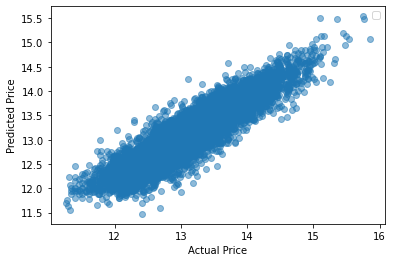

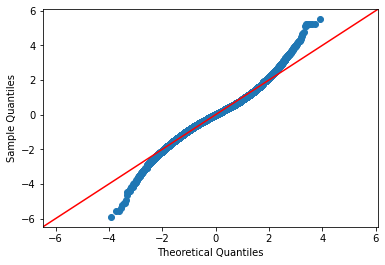

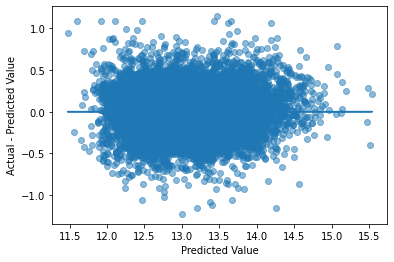

In [46]:
# Linearity check

model = final_model
X_model = X_preprocessed_2
y_model = y_log['price']

preds = model.predict(X_model)
fig, ax = plt.subplots()

ax.scatter(y_model, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

# Normality of residuals check

residuals = (y_model - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

# JB test
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
print("JB Results", list(zip(name, test)))

# Homoscedasticity check

fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_model))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

# Multicollinearity

df_corr=X_model.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)
df_corr[(df_corr.cc>.75) & (df_corr.cc<0.99)]

predictors_int = sm.add_constant(predictors)
model = sm.OLS(y_model,predictors_int).fit()

vif = [variance_inflation_factor(predictors_int.values, i) for i in range(predictors_int.shape[1])]
vif_ser = pd.Series(vif, index=predictors_int.columns, name="Variance Inflation Factor")
print(vif_ser.sort_values()) # nothing above 5 other than constant which implies little multicollinearity

This is by far the best model. It is not perfect but shows remarkable improvement in terms of normality of residuals, homoscedasticity and linearity while maintaining a similar R^2 as the second model. Around 85% of the variation in price is explained by the model.

## Conclusion

In [60]:
final_model.params.sort_values().tail(50) #top 50 coefficients in terms of magnitude

zip_98108          0.339072
zip_98019          0.360462
zip_98045          0.391448
zip_98014          0.393821
zip_98070          0.394969
zip_98059          0.399139
zip_98065          0.436561
zip_98028          0.436647
zip_98155          0.444322
waterfront_YES     0.448698
zip_98118          0.453604
zip_98133          0.470559
zip_98011          0.481119
zip_98024          0.547078
zip_98126          0.554961
zip_98034          0.561801
zip_98125          0.562930
zip_98072          0.575042
zip_98027          0.591515
zip_98077          0.629763
zip_98177          0.634197
zip_98074          0.668852
zip_98144          0.673332
zip_98008          0.673478
zip_98029          0.678963
sqft_living_log    0.679855
zip_98053          0.688810
zip_98136          0.694462
zip_98075          0.703410
zip_98052          0.708085
zip_98007          0.716704
zip_98006          0.756972
zip_98116          0.767911
zip_98115          0.820940
zip_98117          0.821996
zip_98103          0

In [63]:
final_model.params.sort_values().head(30) # bottom 30 coefficients in terms of magnitude

condition_Poor       -0.270790
view_NONE            -0.155519
condition_Fair       -0.126731
view_NA              -0.094408
condition_Good        0.007843
zip_98003             0.046045
condition_VeryGood    0.056405
zip_98198             0.060128
zip_98168             0.064580
zip_98030             0.068030
zip_98092             0.087010
zip_98188             0.087590
zip_98031             0.092711
zip_98042             0.103425
view_GOOD             0.104433
zip_98022             0.107089
zip_98178             0.107598
zip_98055             0.151720
zip_98148             0.175912
zip_98038             0.203183
zip_98058             0.203987
view_EXCELLENT        0.257027
zip_98146             0.268748
zip_98010             0.320623
zip_98166             0.322191
zip_98106             0.335011
zip_98056             0.337996
zip_98108             0.339072
zip_98019             0.360462
zip_98045             0.391448
dtype: float64

In the final model we can see that a house's zip code is highly influential on its sale price, given the magnitude of the coefficients of several zip codes, all of which are statistically significant. Square footage of a house's living space, whether a house is on the waterfront, the quality of view, and how good the condition of the house is also impact sale price. 

e^lny = y

every time a house is in zip code 98039, log of price increases by 1.5, or price increases by 10 to the 1.5 power (~31.6)
every time a house is 1 s